In [1]:
#MGE ESO325
#Obj: Perform the MGE for the galaxy ESO325-G004 in the HST f184W image
#data: 02/04/2020


#Import important packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path

import mgefit
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_1d import mge_fit_1d
from mgefit.sectors_photometry import sectors_photometry
from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_print_contours import mge_print_contours
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist
from mgefit.sectors_photometry_twist import sectors_photometry_twist
from mgefit.mge_print_contours_twist import mge_print_contours_twist
from mgefit.mge_fit_sectors_regularized import mge_fit_sectors_regularized as mge_fit_sectors


def dist_circle(xc, yc, s):
    """
    Returns an array in which the value of each element is its distance from
    a specified center. Useful for masking inside a circular aperture.

    The (xc, yc) coordinates are the ones one can read on the figure axes
    e.g. when plotting the result of my find_galaxy() procedure.

    """
    x, y = np.ogrid[:s[0], :s[1]] - np.array([yc, xc])  # note yc before xc
    rad = np.sqrt(x**2 + y**2)

    return rad


#Open the file

file = '/home/carlos/Documents/GitHub/Master-Degree/ESO325/Dynamical Modelling/MGE and JAM/Data/F814w Interpolated.fits' #Caminho da Imagem
#file = '/home/carlos/Desktop/ESO325 HST Data Reduction/Data/F814w Interpolated.fits'
hdu = fits.open(file) #Abrindo imagem
img = hdu[1].data #Pega os dados da img


#Proporties of the image
skylev= 0.016   #counts/px
img -= skylev   #subtract sky
minlevel = 0.115  #counts/px
scale = 0.04    #arcsec/px
ngauss = 7     #number of desire gaussians



r = dist_circle(574, 69, img.shape)
mask = r > 20





#sigmapsf = [0.494, 1.44, 4.71, 13.4]      # In PC1 pixels
#normpsf = [0.294, 0.559, 0.0813, 0.0657]  # total(normpsf)=1
sigmapsf = 1.27

 Pixels used: 28051
 Peak Img[j, k]: 374 374
 Mean (j, k): 374.10 373.33
 Theta (deg): 22.3
 Astro PA (deg): 67.7
 Eps: 0.237
 Major axis (pix): 109.6


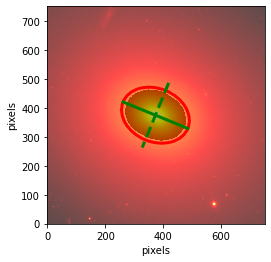

In [2]:
    # Here we use FIND_GALAXY directly inside the procedure. Usually you may want
    # to experiment with different values of the FRACTION keyword, before adopting
    # given values of Eps, Ang, Xc, Yc.
    
plt.clf()
f = find_galaxy(img, fraction=0.05, plot=1)
plt.show()  # Allow plot to appear on the screen

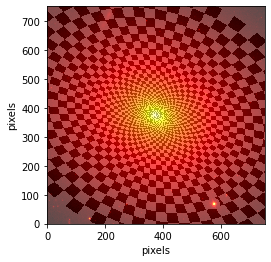

In [7]:
   # Perform galaxy photometry
plt.clf()
s = sectors_photometry(img, f.eps, f.theta, f.xpeak, f.ypeak,
                           minlevel=0.05, plot=1, mask=mask)

Iteration: 1  chi2: 35.39  Nonzero: 6/7
Nonzero Gaussians: 7/7
Eliminating not useful Gaussians...
ngauss: 6           chi2: 3.56
Starting nonlinear fit...
Iteration: 1  chi2: 3.559  Nonzero: 6/6
Nonzero Gaussians: 6/6
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.15 seconds
  Total Iterations:  3
 Nonzero Gaussians:  6
  Unused Gaussians:  1
 Sectors used in the fit:  19
 Total number of points fitted:  912
 Chi2: 0.6185 
 STDEV: 0.02603 
 MEANABSDEV: 0.01403 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      140.457      1.74079     0.841163
       4181.2       8.8563     0.871597
      13070.5      20.0975     0.733011
        28746      41.5152     0.749777
      52828.4      98.5914      0.77575
       110922       250.31     0.835069
++++++++++++++++++++++++++++++++++++++++++++
(minloop) qbounds=0.0000 1.0000
######

Nonzero Gaussians: 6/6
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.15 seconds
  Total Iterations:  3
 Nonzero Gaussians:  6
  Unused Gaussians:  1
 Sectors used in the fit:  19
 Total number of points fitted:  912
 Chi2: 0.6185 
 STDEV: 0.02603 
 MEANABSDEV: 0.01403 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      140.457      1.74079     0.841163
       4181.2       8.8563     0.871597
      13070.5      20.0975     0.733011
        28746      41.5152     0.749777
      52828.4      98.5914      0.77575
       110922       250.31     0.835069
++++++++++++++++++++++++++++++++++++++++++++
(minloop) qbounds=0.4000 1.0000
############################################
Iteration: 1  chi2: 35.39  Nonzero: 6/7
Nonzero Gaussians: 7/7
Eliminating not useful Gaussians...
ngauss: 6           chi2: 3.56
Starting nonlinear fit...
I

Nonzero Gaussians: 6/6
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.22 seconds
  Total Iterations:  6
 Nonzero Gaussians:  6
  Unused Gaussians:  1
 Sectors used in the fit:  19
 Total number of points fitted:  912
 Chi2: 0.6185 
 STDEV: 0.02603 
 MEANABSDEV: 0.01402 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      140.265       1.7364     0.844481
      4167.98      8.84771     0.871755
        13049      20.0666     0.733188
      28757.3      41.4829      0.74967
      52842.2      98.5572     0.775825
       110931       250.31     0.835004
++++++++++++++++++++++++++++++++++++++++++++
(maxloop) qbounds=0.7000 0.9000
############################################
############################################
Final Regularized MGE Solution:
  Total_Counts  Sigma_Pixels      qObs
#########################################

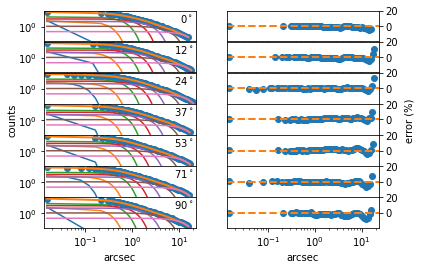

In [8]:
# Do the actual MGE fit
    # *********************** IMPORTANT ***********************************
    # For the final publication-quality MGE fit one should include the line
    # "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
    # at the top of this file, rename mge_fit_sectors() into
    # mge_fit_sectors_regularized() and re-run the procedure.
    # See the documentation of mge_fit_sectors_regularized for details.
    # *********************************************************************

plt.clf()
m = mge_fit_sectors(s.radius, s.angle, s.counts, f.eps,
                        ngauss=ngauss, sigmapsf=sigmapsf,
                        scale=scale, plot=1, bulge_disk=0, linear=0)

<Figure size 432x288 with 0 Axes>

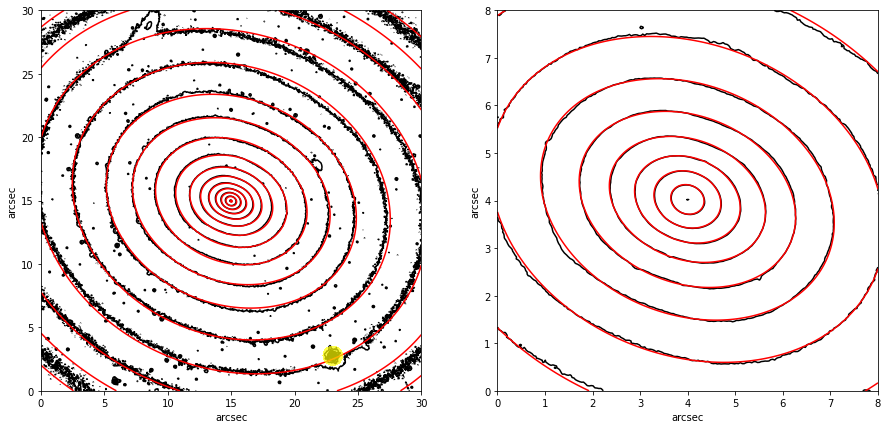

In [42]:
plt.clf()
plt.figure(figsize=(15,15))
plt.subplot(121)
ctc, model = mge_print_contours(img, f.theta, f.xpeak-0.75, f.ypeak+0.75, m.sol, scale=scale,
                        sigmapsf=sigmapsf, magrange=10, mask=mask)


n = 100
img_sub = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
plt.subplot(122)
ctc2, model2 = mge_print_contours(img_sub, f.theta, xc, yc, m.sol,
                       sigmapsf=sigmapsf, scale=scale)

plt.show()

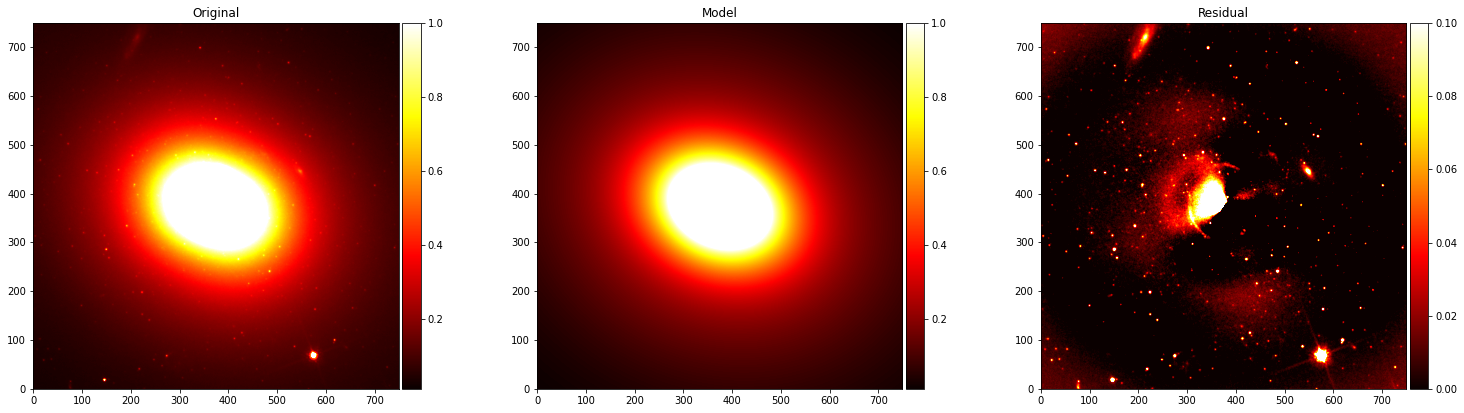

In [43]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(1,3, figsize=(25, 7))
plt.subplots_adjust(hspace=0.0, wspace=0.3)

#Image
origial_plt = axes[0].imshow(img, origin='lower', vmin=0.0123, vmax=1., cmap="hot")
axes[0].set_title("Original")

divider = make_axes_locatable(axes=axes[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(origial_plt, ax=axes[0], cax=cax)


#Model
model_plt = axes[1].imshow(model, origin='lower',vmin=0.0123, vmax=1., cmap="hot")
axes[1].set_title("Model")

divider = make_axes_locatable(axes=axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(model_plt, ax=axes[1], cax=cax)


#Residual
diff_plt = axes[2].imshow(img - model, origin='lower', vmin=0, vmax=0.1, cmap="hot")
axes[2].set_title("Residual")

divider = make_axes_locatable(axes=axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(diff_plt, ax=axes[2], cax=cax)

In [37]:
fits.writeto(filename="esodiff.fits", data=(img - model), overwrite=True)